<a href="https://colab.research.google.com/github/anandaditya07/ML-project-files/blob/ADITYA-ANAND/infosys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!pip install scikit-learn pandas numpy matplotlib --quiet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10, 4)


In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/HomeC_augmented.csv') #for loading

In [35]:
# Chcking Null Values
df.isnull().sum()

,0
Unnamed: 0,0
time,0
Dishwasher,0
Home office,0
Fridge,0
Wine cellar,0
Garage door,0
Barn,0
Well,0
Microwave,0


In [36]:
# Check Duplicate values
df.duplicated().sum()

np.int64(0)

In [37]:
#Outliers
df.describe() #provides a statistical summary of the numerical columns in your DataFrame


,Unnamed: 0,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,...,use_HO,gen_Sol,Car charger [kW],Water heater [kW],Air conditioning [kW],Home Theater [kW],Outdoor lights [kW],microwave [kW],Laundry [kW],Pool Pump [kW]
count,503910.00000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,...,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000
mean,251954.50000,0.031368,0.081287,0.063556,0.042137,0.014139,0.058530,0.015642,0.010983,0.035313,...,0.858962,0.076229,1.994610,0.068544,0.023499,0.020598,0.125655,0.426828,0.039124,0.147447
std,145466.43141,0.190951,0.104466,0.076199,0.057967,0.014292,0.202706,0.137841,0.098859,0.096056,...,1.058207,0.128428,0.399178,0.033606,0.010980,0.007259,0.004271,0.749806,0.013610,0.040638
min,0.00000,0.000000,0.000083,0.000067,0.000017,0.000017,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.013034,0.000218,0.003640,0.000481,0.000800,0.000000,0.000000,0.000746
25%,125977.25000,0.000000,0.040383,0.005083,0.007133,0.012733,0.029833,0.000983,0.003617,0.001483,...,0.367667,0.003367,1.582865,0.044391,0.014272,0.015073,0.123200,0.000000,0.030434,0.113046
50%,251954.50000,0.000017,0.042217,0.005433,0.008083,0.012933,0.031317,0.001000,0.004000,0.001617,...,0.562333,0.004283,2.041722,0.056158,0.023025,0.017587,0.125600,0.024071,0.035722,0.133373
75%,377931.75000,0.000233,0.068283,0.125417,0.053192,0.013100,0.032883,0.001017,0.004067,0.001750,...,0.970250,0.083917,2.395722,0.088431,0.032560,0.027018,0.128400,1.134812,0.045920,0.183410
max,503909.00000,1.401767,0.971750,0.851267,1.273933,1.088983,7.027900,1.633017,1.929800,0.465217,...,14.714567,0.613883,2.664058,0.168281,0.049870,0.042945,0.142600,6.107473,0.103677,0.255069


In [38]:
print("First 5 rows of the DataFrame:")
print(df.head())

print("\nShape of the DataFrame (rows, columns):")
print(df.shape)

print("\nConcise summary of the DataFrame:")
df.info()

First 5 rows of the DataFrame:
   Unnamed: 0                 time  Dishwasher  Home office    Fridge  \
0           0  2016-01-01 05:00:00    0.000033     0.442633  0.124150   
1           1  2016-01-01 05:01:00    0.000000     0.444067  0.124000   
2           2  2016-01-01 05:02:00    0.000017     0.446067  0.123533   
3           3  2016-01-01 05:03:00    0.000017     0.446583  0.123133   
4           4  2016-01-01 05:04:00    0.000133     0.446533  0.122850   

   Wine cellar  Garage door      Barn      Well  Microwave  ...    use_HO  \
0     0.006983     0.013083  0.031350  0.001017   0.004067  ...  0.932833   
1     0.006983     0.013117  0.031500  0.001017   0.004067  ...  0.934333   
2     0.006983     0.013083  0.031517  0.001000   0.004067  ...  0.931817   
3     0.006983     0.013000  0.031500  0.001017   0.004067  ...  1.022050   
4     0.006850     0.012783  0.031500  0.001017   0.004067  ...  1.139400   

    gen_Sol  Car charger [kW]  Water heater [kW]  Air conditioning 

In [39]:
df['Timestamp'] = pd.to_datetime(df['time'])
df = df.drop(columns=['time'])
print("New 'Timestamp' column created and original 'time' column dropped.")
print(df.head())

New 'Timestamp' column created and original 'time' column dropped.
   Unnamed: 0  Dishwasher  Home office    Fridge  Wine cellar  Garage door  \
0           0    0.000033     0.442633  0.124150     0.006983     0.013083   
1           1    0.000000     0.444067  0.124000     0.006983     0.013117   
2           2    0.000017     0.446067  0.123533     0.006983     0.013083   
3           3    0.000017     0.446583  0.123133     0.006983     0.013000   
4           4    0.000133     0.446533  0.122850     0.006850     0.012783   

       Barn      Well  Microwave  Living room  ...   gen_Sol  \
0  0.031350  0.001017   0.004067     0.001517  ...  0.003483   
1  0.031500  0.001017   0.004067     0.001650  ...  0.003467   
2  0.031517  0.001000   0.004067     0.001650  ...  0.003467   
3  0.031500  0.001017   0.004067     0.001617  ...  0.003483   
4  0.031500  0.001017   0.004067     0.001583  ...  0.003467   

   Car charger [kW]  Water heater [kW]  Air conditioning [kW]  \
0          0.0

In [40]:
df.set_index('Timestamp', inplace=True)
print("Timestamp column set as DataFrame index.")

print("\nConfirming DataFrame info after setting index:")
df.info()

print("\nDataFrame index:")
print(df.index)

Timestamp column set as DataFrame index.

Confirming DataFrame info after setting index:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503910 entries, 2016-01-01 05:00:00 to 2016-12-16 03:29:00
Data columns (total 41 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             503910 non-null  int64  
 1   Dishwasher             503910 non-null  float64
 2   Home office            503910 non-null  float64
 3   Fridge                 503910 non-null  float64
 4   Wine cellar            503910 non-null  float64
 5   Garage door            503910 non-null  float64
 6   Barn                   503910 non-null  float64
 7   Well                   503910 non-null  float64
 8   Microwave              503910 non-null  float64
 9   Living room            503910 non-null  float64
 10  temperature            503910 non-null  float64
 11  humidity               503910 non-null  float64
 12  visibility         

In [41]:
print("Checking for null values after timestamp processing:")
print(df.isnull().sum())

Checking for null values after timestamp processing:
Unnamed: 0               0
Dishwasher               0
Home office              0
Fridge                   0
Wine cellar              0
Garage door              0
Barn                     0
Well                     0
Microwave                0
Living room              0
temperature              0
humidity                 0
visibility               0
apparentTemperature      0
pressure                 0
windSpeed                0
cloudCover               0
windBearing              0
precipIntensity          0
dewPoint                 0
precipProbability        0
Furnace                  0
Kitchen                  0
year                     0
month                    0
day                      0
weekday                  0
weekofyear               0
hour                     0
minute                   0
timing                   0
use_HO                   0
gen_Sol                  0
Car charger [kW]         0
Water heater [kW]        0
Ai

In [42]:
print("Checking for duplicate rows after timestamp processing:")
print(df.duplicated().sum())

Checking for duplicate rows after timestamp processing:
0


In [43]:
df.drop_duplicates(inplace=True)
print("Duplicate rows removed.")
print(f"Number of remaining duplicate rows: {df.duplicated().sum()}")

Duplicate rows removed.
Number of remaining duplicate rows: 0


In [44]:
print("Descriptive statistics for numerical columns:")
print(df.describe())

Descriptive statistics for numerical columns:
         Unnamed: 0     Dishwasher    Home office         Fridge  \
count  503910.00000  503910.000000  503910.000000  503910.000000   
mean   251954.50000       0.031368       0.081287       0.063556   
std    145466.43141       0.190951       0.104466       0.076199   
min         0.00000       0.000000       0.000083       0.000067   
25%    125977.25000       0.000000       0.040383       0.005083   
50%    251954.50000       0.000017       0.042217       0.005433   
75%    377931.75000       0.000233       0.068283       0.125417   
max    503909.00000       1.401767       0.971750       0.851267   

         Wine cellar    Garage door           Barn           Well  \
count  503910.000000  503910.000000  503910.000000  503910.000000   
mean        0.042137       0.014139       0.058530       0.015642   
std         0.057967       0.014292       0.202706       0.137841   
min         0.000017       0.000017       0.000000       0.000000

In [45]:
# The 'Appliance Type' column does not exist in the DataFrame.
# The current DataFrame has separate columns for each appliance's energy consumption (e.g., 'Dishwasher', 'Fridge').
# If you intend to analyze consumption by individual appliances, a different approach is needed (e.g., melting the DataFrame or iterating through appliance columns).
print("Column 'Appliance Type' not found in DataFrame. Please check available columns or your intent.")

# Create 'Season' column from 'month'
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['month'].apply(get_season)

print("\nUnique values and counts for 'Season':")
print(df['Season'].value_counts())

Column 'Appliance Type' not found in DataFrame. Please check available columns or your intent.

Unique values and counts for 'Season':
Season
Spring    132480
Summer    132480
Fall      131040
Winter    107910
Name: count, dtype: int64


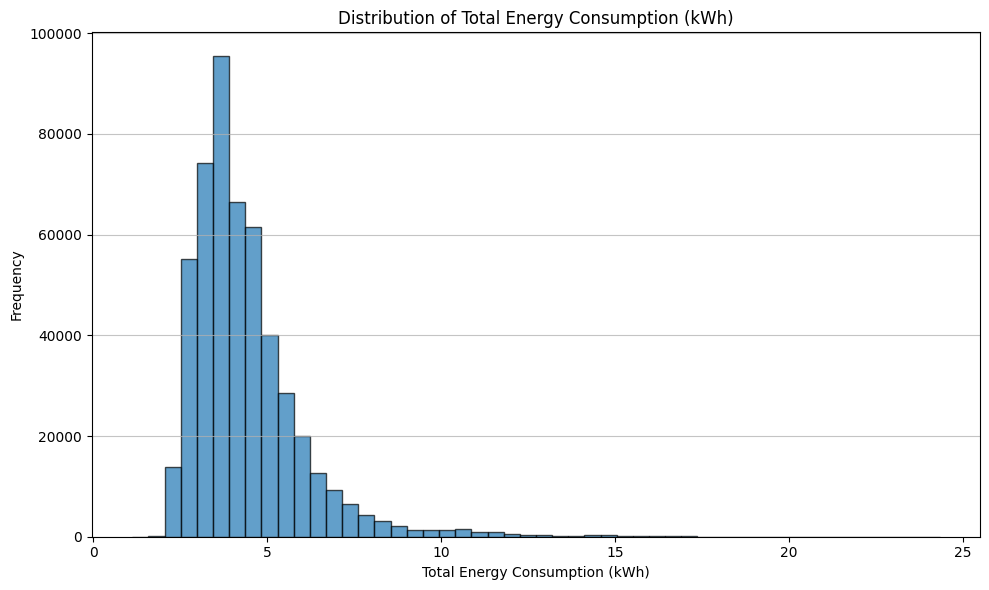

In [46]:
import matplotlib.pyplot as plt

# List of all appliance consumption columns
appliance_columns = [
    'Dishwasher', 'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
    'Living room', 'Furnace', 'Kitchen', 'use_HO', 'gen_Sol', 'Car charger [kW]', 'Water heater [kW]',
    'Air conditioning [kW]', 'Home Theater [kW]', 'Outdoor lights [kW]', 'microwave [kW]', 'Laundry [kW]',
    'Pool Pump [kW]'
]

# Create a new column 'Total Energy Consumption (kWh)' by summing all appliance consumptions
df['Total Energy Consumption (kWh)'] = df[appliance_columns].sum(axis=1)

plt.figure(figsize=(10, 6))
plt.hist(df['Total Energy Consumption (kWh)'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Total Energy Consumption (kWh)')
plt.xlabel('Total Energy Consumption (kWh)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

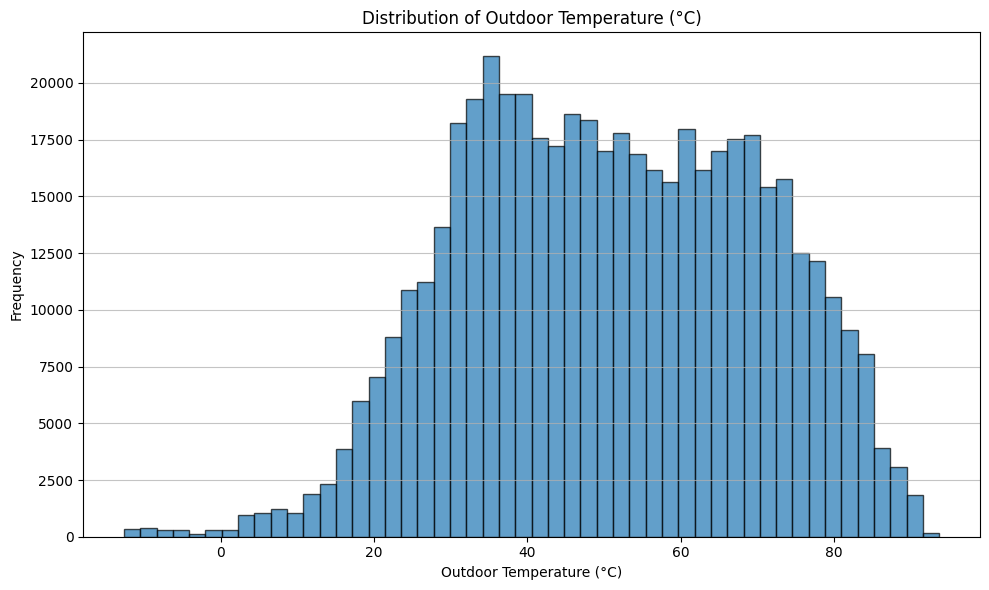

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['temperature'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Outdoor Temperature (°C)')
plt.xlabel('Outdoor Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

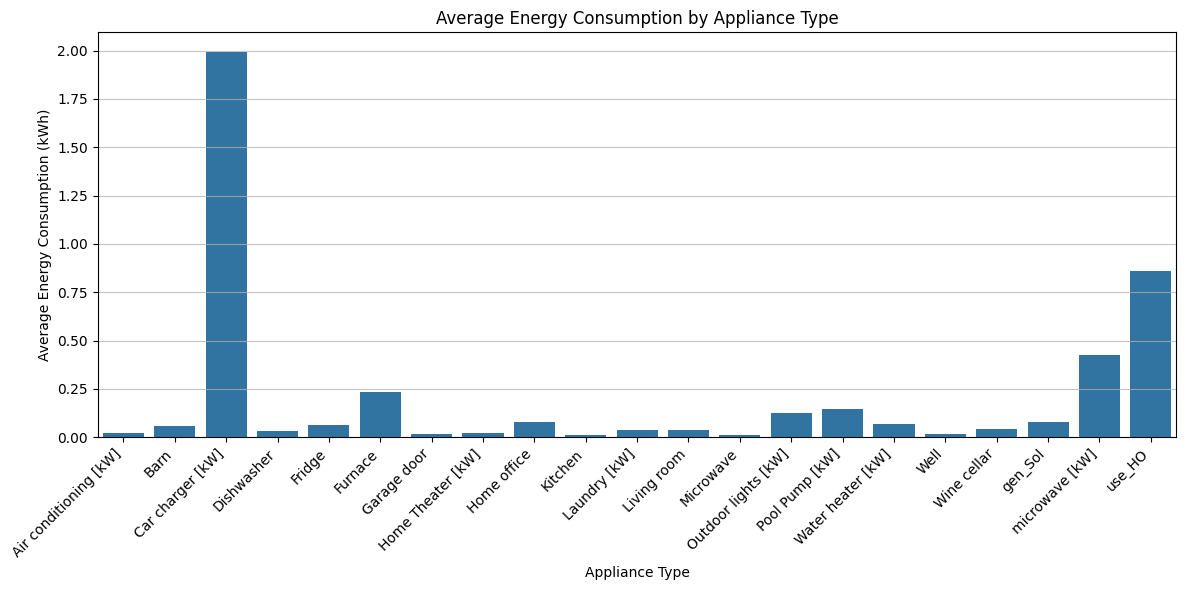

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of all appliance consumption columns (assuming 'appliance_columns' is already defined in the environment)
# If not, it would need to be explicitly defined again here.
# For robustness, ensuring appliance_columns is defined:
appliance_columns = [
    'Dishwasher', 'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
    'Living room', 'Furnace', 'Kitchen', 'use_HO', 'gen_Sol', 'Car charger [kW]', 'Water heater [kW]',
    'Air conditioning [kW]', 'Home Theater [kW]', 'Outdoor lights [kW]', 'microwave [kW]', 'Laundry [kW]',
    'Pool Pump [kW]'
]

# Melt the DataFrame to transform appliance columns into a single 'Appliance Type' column
# and a corresponding 'Energy Consumption (kWh)' column.
df_melted = df.melt(value_vars=appliance_columns,
                     var_name='Appliance Type',
                     value_name='Energy Consumption (kWh)')

# Calculate the average energy consumption for each appliance type
average_consumption_by_appliance = df_melted.groupby('Appliance Type')['Energy Consumption (kWh)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Appliance Type', y='Energy Consumption (kWh)', data=average_consumption_by_appliance, ci=None)
plt.title('Average Energy Consumption by Appliance Type')
plt.xlabel('Appliance Type')
plt.ylabel('Average Energy Consumption (kWh)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

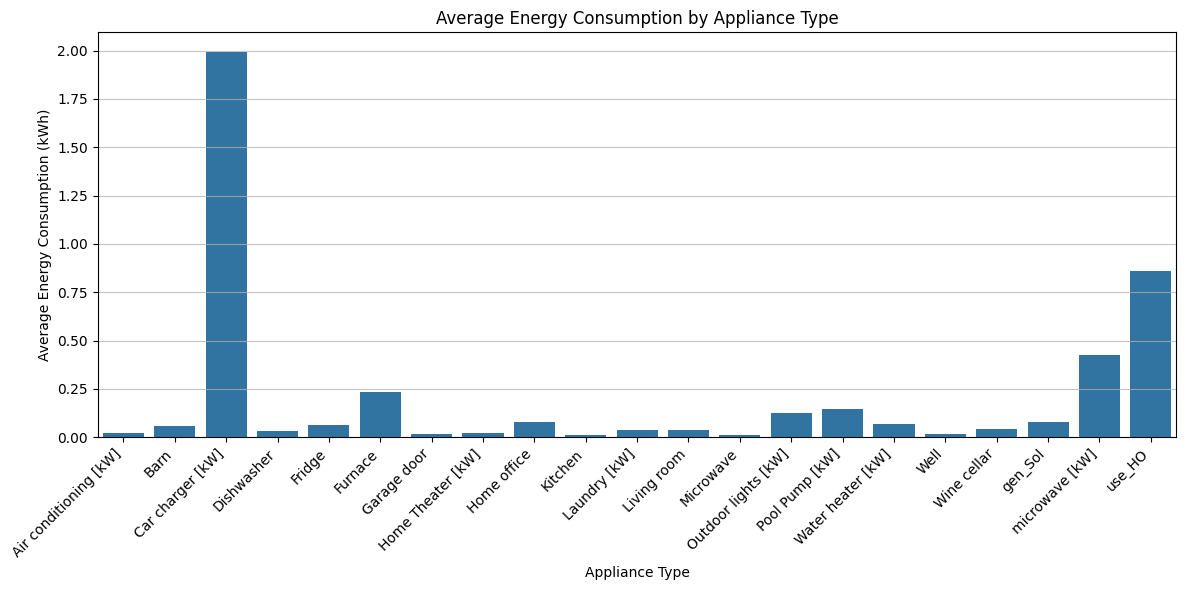

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='Appliance Type', y='Energy Consumption (kWh)', data=average_consumption_by_appliance, ci=None)
plt.title('Average Energy Consumption by Appliance Type')
plt.xlabel('Appliance Type')
plt.ylabel('Average Energy Consumption (kWh)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

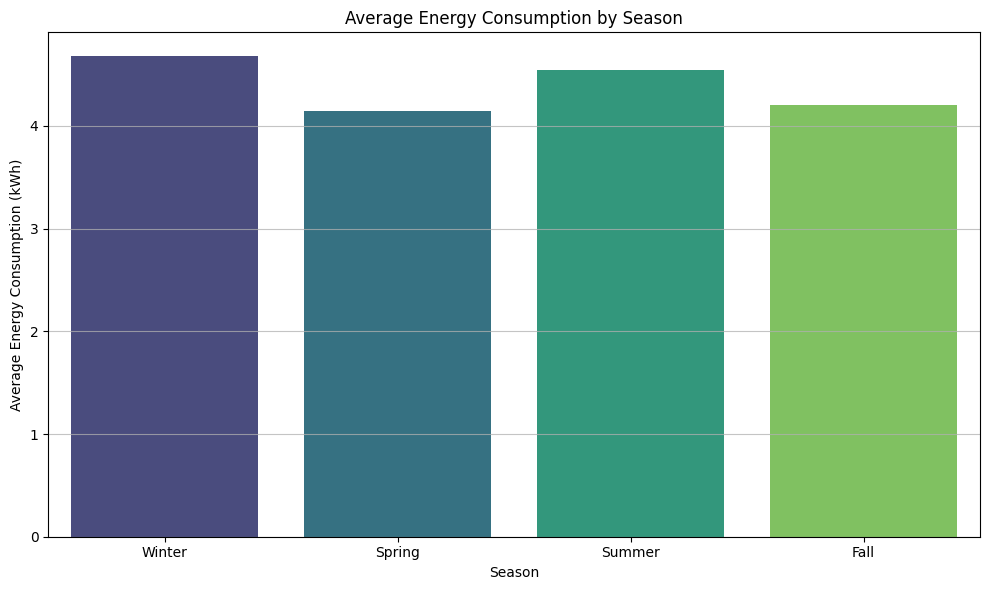

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Total Energy Consumption (kWh)', data=df, errorbar=None, palette='viridis')
plt.title('Average Energy Consumption by Season')
plt.xlabel('Season')
plt.ylabel('Average Energy Consumption (kWh)')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

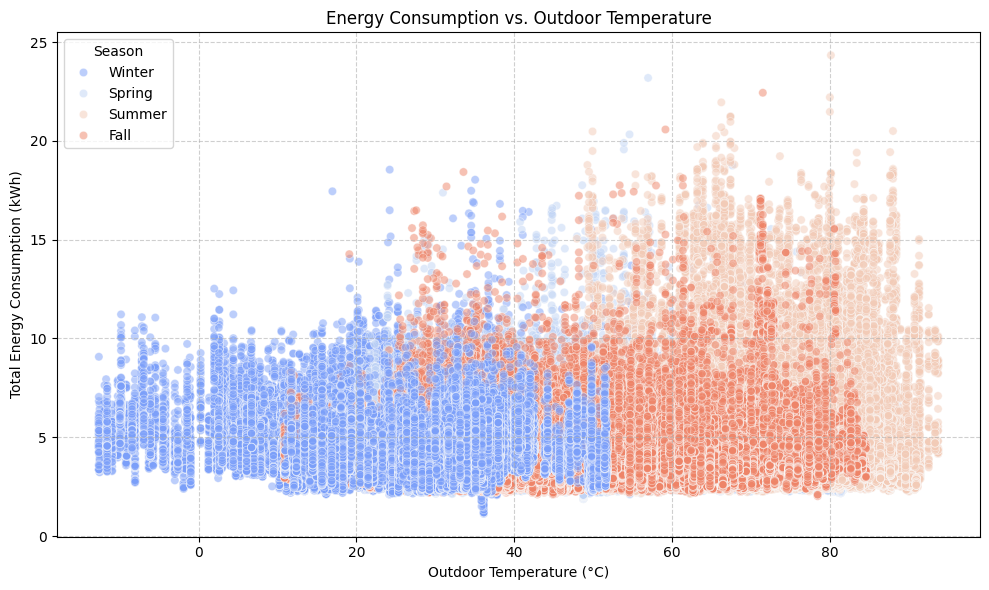

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='Total Energy Consumption (kWh)', data=df, alpha=0.5, hue='Season', palette='coolwarm')
plt.title('Energy Consumption vs. Outdoor Temperature')
plt.xlabel('Outdoor Temperature (°C)')
plt.ylabel('Total Energy Consumption (kWh)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()